In [704]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.stats.multitest as smsm

In [809]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2.0) / ((UH-UL)/2.0)  
    return np.round(x,3)

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2.0 + (UH+UL)/2.0
    return np.round(U, 2)

In [810]:
data = pd.read_csv("1_RESULTS_TMSJGGAS_2023-01-20.csv")
data['PQ'] = 0

In [811]:
# data = data[data["TS"]!=0.2]
data.columns = ["TS","MS","PL","PT","Y",'PQ']
data['TS'].unique(), data['MS'].unique(), data['PL'].unique()

(array([0.2, 0.4]), array([74, 90]), array([50, 90]))

In [812]:
data.shape

(1600, 6)

In [813]:
MS_U = 90
MS_L = 74
PL_U = 90
PL_L = 50
TS_U = 0.4
TS_L = 0.2

In [814]:
def find_centroid():
    return convertCtoN(0, MS_U,MS_L), convertCtoN(0, PL_U, PL_L), convertCtoN(0,TS_U, TS_L)

In [815]:
find_centroid()

(82.0, 70.0, 0.3)

In [816]:
centroid = pd.read_csv("2_RESULTS_TMSJGGAS_2023-01-20.csv")
centroid['PQ'] = 0
centroid.columns = ["TS","MS","PL","PT","Y",'PQ']


In [817]:
new_point_1 = pd.read_csv("3_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_1["PQ"] = 0
new_point_1.columns = ["TS","MS","PL","PT","Y",'PQ']

In [818]:
new_point_2 = pd.read_csv("4_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_2["PQ"] = 0
new_point_2.columns = ["TS","MS","PL","PT","Y",'PQ']

In [819]:
new_point_34 = pd.read_csv("5_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_34["PQ"] = 0
new_point_34.columns = ["TS","MS","PL","PT","Y",'PQ']

In [820]:
new_point_ccd2 = pd.read_csv("6_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_ccd2["PQ"] = 1
new_point_ccd2.columns = ["TS","MS","PL","PT","Y",'PQ']

In [784]:
new_point_ccd3 = pd.read_csv("7_RESULTS_TMSJGGAS_2023-01-20.csv")
new_point_ccd3["PQ"] = 0
new_point_ccd3.columns = ["TS","MS","PL","PT","Y",'PQ']

In [785]:
new_point_final = pd.read_csv("8_RESULTS_TMSJGGAS_2023-01-21.csv")
new_point_final["PQ"] = 0
new_point_final.columns = ["TS","MS","PL","PT","Y",'PQ']

In [826]:
# data = pd.concat([data,centroid,new_point_1,new_point_2,new_point_34,new_point_ccd2,new_point_ccd3,new_point_final])
# data = pd.concat([centroid,new_point_1,new_point_2,new_point_34,new_point_ccd2,new_point_ccd3])
data = pd.concat([centroid,new_point_1,new_point_2,new_point_34,new_point_ccd2])

In [827]:
# data = data[data["TS"]!=0.2]
data.columns = ["TS","MS","PL","PT","Y",'PQ']
data['TS'].unique(), data['MS'].unique(), data['PL'].unique()

(array([0.3]), array([82, 79, 76, 73, 85]), array([70, 65, 60, 55, 75]))

In [828]:
MS_U = 88
MS_L = 70
PL_U = 85
PL_L = 55
TS_U = 0.4
TS_L = 0.2

In [829]:
find_centroid()

(79.0, 70.0, 0.3)

In [830]:
# codata = pd.DataFrame()

In [831]:
# # codata['x1'] = (data["MS"]==90).astype(int) - (data["MS"]==60).astype(int)
# # codata['x2'] = (data["PL"]==80).astype(int) - (data["PL"]==50).astype(int)
# # codata['x3'] = (data["TS"]==0.2).astype(int) - (data["TS"]==0.1).astype(int)
# # codata['x4'] = (data["PT"]=='TT').astype(int)
# # codata["y"] = data["Y"]
# # codata['PQ'] = 1 * (data['TS']==0.2)

# codata['x1'] = convertNtoC(data['MS'], MS_U, MS_L)
# codata['x2'] = convertNtoC(data['PL'],PL_U, PL_L)
# codata['x3'] = convertNtoC(data['TS'], TS_U, TS_L)
# codata['x4'] = (data["PT"]=='TT').astype(int)
# codata["y"] = data["Y"]
# codata['PQ'] = 0

# # codata['PQ'] = 1 * (data['TS']==convertCtoN(0,TS_L,TS_U))

In [832]:
# codata

In [833]:
TT = data[data["PT"]=="TT"]
TT.groupby(["PL","MS","PT"]).mean()

TS          Y   PQ
PL MS PT                     
55 79 TT  0.3  11.832927  1.0
60 76 TT  0.3  11.606464  0.0
   82 TT  0.3  11.414557  0.0
65 73 TT  0.3  10.780183  1.0
   79 TT  0.3  11.013506  0.0
   85 TT  0.3  11.032854  1.0
70 76 TT  0.3  10.484635  0.0
   82 TT  0.3  10.742846  0.0
75 79 TT  0.3  10.238236  1.0

In [789]:
modelfull = smf.ols('Y ~ PT * MS * PL * TS', data = data).fit()
modelfull.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     965.7
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:44:08   Log-Likelihood:                -6096.0
No. Observations:                3400   AIC:                         1.222e+04
Df Residuals:                    3384   BIC:                         1.232e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            27.8541      6.106      4.561      0.000      15.881      39.827
PT[T.TT]             -8.9291      8.613     -1.037      0.300     -25.817       7.959
MS                   -0.1365      0.074     -1.842      0.066      -0.282       0.009
PT[T.TT]:MS           0.0334      0.105      0.319      0.750      -0.172       0.238
PL                   -0.2896      0.084     -3.452      0.001      -0.454      -0.125
PT[T.TT]:PL           0.0003      0.118      0.003      0.998      -0.232       0.232
MS:PL                 0.0038      0.001      3.736      0.000       0.002       0.006
PT[T.TT]:MS:PL     1.162e-05      0.001      0.008      0.994      -0.003       0.003
TS                   -4.1817     19.310     -0.217      0.829     -42.043      33.679
PT[T.TT]:TS           6.8567     27.309      0.251      0.802     -46.687      60.400
MS:TS                 0.0275      0.234      0.117      0.907      -0.432       0.487
PT[T.TT]:MS:TS       -0.0485      0.331     -0.146      0.884      -0.698       0.601
PL:TS                 0.1128      0.265      0.425      0.671      -0.407       0.633
PT[T.TT]:PL:TS       -0.1229      0.375     -0.328      0.743      -0.858       0.613
MS:PL:TS             -0.0011      0.003     -0.338      0.735      -0.007       0.005
PT[T.TT]:MS:PL:TS     0.0010      0.005      0.229      0.819      -0.008       0.010
==============================================================================
Omnibus:                        7.892   Durbin-Watson:                   1.472
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.526
Skew:                          -0.086   Prob(JB):                       0.0232
Kurtosis:                       2.846   Cond. No.                     9.97e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.97e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [794]:
model = smf.ols('Y ~ MS * PL + PT', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     3584.
Date:                Fri, 20 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:45:15   Log-Likelihood:                -6114.6
No. Observations:                3400   AIC:                         1.224e+04
Df Residuals:                    3395   BIC:                         1.227e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.1449      1.331     19.639      0.000      23.535      28.755
PT[T.TT]      -6.0668      0.058   -105.173      0.000      -6.180      -5.954
MS            -0.1177      0.016     -7.251      0.000      -0.150      -0.086
PL            -0.2792      0.018    -15.223      0.000      -0.315      -0.243
MS:PL          0.0037      0.000     16.483      0.000       0.003       0.004
==============================================================================
Omnibus:                       14.117   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               12.570
Skew:                          -0.100   Prob(JB):                      0.00186
Kurtosis:                       2.779   Cond. No.                     3.08e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.08e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [795]:
sm.stats.anova_lm(model, modelfull)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,3395.0,7262.464087,0.0,NaN,NaN,NaN
1,3384.0,7183.264560,11.0,79.199527,3.391864,0.000109


In [850]:
TT = data[data["PT"]=='TT']

In [797]:
model_full_tt = smf.ols('Y ~ PL * MS + PQ', data = TT).fit()
# model_red_tt = smf.ols('y ~ x1 *x2', data = TT).fit()
model_full_tt.summary()
# sm.stats.anova_lm(model_red_tt, model_full_tt)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.328
Method:                 Least Squares   F-statistic:                     306.4
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          1.40e-214
Time:                        18:45:31   Log-Likelihood:                -4486.8
No. Observations:                2500   AIC:                             8984.
Df Residuals:                    2495   BIC:                             9013.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.5178      1.838     11.705      0.000      17.913      25.123
PL            -0.3130      0.025    -12.326      0.000      -0.363      -0.263
MS            -0.1264      0.023     -5.617      0.000      -0.171      -0.082
PL:MS          0.0040      0.000     12.875      0.000       0.003       0.005
PQ            -0.7813      0.081     -9.617      0.000      -0.941      -0.622
==============================================================================
Omnibus:                       31.922   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.693
Skew:                           0.099   Prob(JB):                     1.95e-05
Kurtosis:                       2.589   Cond. No.                     3.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [798]:
model_grad = smf.ols('Y ~ PL + MS', data = TT).fit()
model_grad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     448.3
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          4.47e-167
Time:                        18:45:33   Log-Likelihood:                -4602.8
No. Observations:                2500   AIC:                             9212.
Df Residuals:                    2497   BIC:                             9229.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0004      0.465     -4.299      0.000      -2.913      -1.088
PL             0.0164      0.002      7.001      0.000       0.012       0.021
MS             0.1580      0.005     29.305      0.000       0.147       0.169
==============================================================================
Omnibus:                       43.368   Durbin-Watson:                   1.271
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.619
Skew:                           0.160   Prob(JB):                     2.25e-07
Kurtosis:                       2.562   Cond. No.                     1.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [799]:
model_grad.params.values[1:]

array([0.01636591, 0.1579954 ])

In [800]:
def grad_desc(model, lam , iter_, begin):
    params = model.params[1:]
    if begin is None:
        begin = [0]*len(params)
    nxt = begin
    while(iter_):
        nxt = nxt - lam*params
        eta = model.params[0] + nxt[0]*model.params[1] + nxt[1]*model.params[2]
        print(nxt, eta)
        print(convertCtoN(nxt[0],MS_U,MS_L),convertCtoN(nxt[1],PL_U,PL_L))
        iter_-=1
    

In [761]:
convertCtoN(0,UH=MS_U, UL=MS_L), convertCtoN(0,UH=PL_U, UL=PL_L)

(79.0, 70.0)

In [762]:
convertNtoC(60, UH=PL_U,UL=PL_L), convertNtoC(79,MS_U, MS_L)

(-0.667, 0.0)

In [763]:
find_centroid()

(79.0, 70.0, 0.3)

In [759]:
step_size = 0.5/0.02061197
step_size

24.257749259289625

In [437]:
grad_desc(model_grad, lam = step_size, iter_ = 10)

x1   -0.043026
x2    0.500000
dtype: float64 10.621748501
80.31 70.0
x1   -0.086052
x2    1.000000
dtype: float64 10.2034301275511
80.11 75.0
x1   -0.129077
x2    1.500000
dtype: float64 9.785111754102196
79.92 80.0
x1   -0.172103
x2    2.000000
dtype: float64 9.366793380653295
79.73 85.0
x1   -0.215129
x2    2.500000
dtype: float64 8.948475007204392
79.53 90.0
x1   -0.258155
x2    3.000000
dtype: float64 8.530156633755489
79.34 95.0
x1   -0.301181
x2    3.500000
dtype: float64 8.111838260306588
79.14 100.0
x1   -0.344207
x2    4.000000
dtype: float64 7.693519886857684
78.95 105.0
x1   -0.387232
x2    4.500000
dtype: float64 7.275201513408783
78.76 110.0
x1   -0.430258
x2    5.000000
dtype: float64 6.85688313995988
78.56 115.0


In [807]:
TT = data[data["PT"]=='TT']
TT.groupby(["PL","MS","PT","TS"]).mean()

Y   PQ
PL MS PT TS                 
50 74 TT 0.2  12.444984  0.0
         0.4  12.533400  0.0
   90 TT 0.2  13.289903  0.0
         0.4  13.303781  0.0
55 79 TT 0.3  11.832927  1.0
60 76 TT 0.3  11.606464  0.0
   82 TT 0.3  11.414557  0.0
65 73 TT 0.3  10.780183  1.0
   79 TT 0.3  11.013506  0.0
   85 TT 0.3  11.032854  1.0
70 76 TT 0.3  10.484635  0.0
   82 TT 0.3  10.742846  0.0
75 73 TT 0.3  10.120102  0.0
   75 TT 0.3  10.022093  0.0
   76 TT 0.3  10.029552  0.0
   77 TT 0.3  10.085783  0.0
   79 TT 0.3  10.238236  1.0
   85 TT 0.3  11.490293  0.0
80 76 TT 0.3  10.616193  0.0
   82 TT 0.3  11.769689  0.0
85 79 TT 0.3  12.390959  0.0
90 74 TT 0.2  12.678196  0.0
         0.4  12.657490  0.0
   90 TT 0.2  15.404821  0.0
         0.4  15.303599  0.0

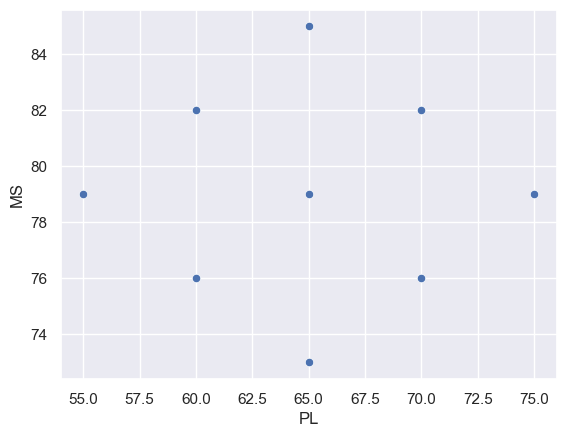

In [864]:
sns.set_theme(style="darkgrid")
# fig1 = sns.scatterplot(x="PL",  y="MS", data=data,ci=None)
fig1 = sns.scatterplot(x="PL",  y="MS", data=TT,ci=None)

In [865]:
TT.groupby(["PL","MS","PT","TS"]).mean()

Y   PQ
PL MS PT TS                 
55 79 TT 0.3  11.832927  1.0
60 76 TT 0.3  11.606464  0.0
   82 TT 0.3  11.414557  0.0
65 73 TT 0.3  10.780183  1.0
   79 TT 0.3  11.013506  0.0
   85 TT 0.3  11.032854  1.0
70 76 TT 0.3  10.484635  0.0
   82 TT 0.3  10.742846  0.0
75 79 TT 0.3  10.238236  1.0

In [866]:
##CCD
# model_ccd = smf.ols('y ~ x1+x2 +x1:x2+ I(x1**2) + I(x2**2)', data = TT).fit()
# model_ccd.summary()
model_ccd = smf.ols('Y ~ PL*MS+ I(PL**2) + I(MS**2)', data = TT).fit()
model_ccd.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     41.22
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           3.16e-38
Time:                        20:58:10   Log-Likelihood:                -1297.6
No. Observations:                 900   AIC:                             2607.
Df Residuals:                     894   BIC:                             2636.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.0872     29.011      0.899      0.369     -30.849      83.024
PL            -0.6439      0.309     -2.085      0.037      -1.250      -0.038
MS             0.2022      0.551      0.367      0.714      -0.879       1.283
PL:MS          0.0075      0.003      2.192      0.029       0.001       0.014
I(PL ** 2)    -0.0002      0.001     -0.213      0.831      -0.002       0.002
I(MS ** 2)    -0.0043      0.003     -1.338      0.181      -0.011       0.002
==============================================================================
Omnibus:                        2.876   Durbin-Watson:                   1.924
Prob(Omnibus):                  0.237   Jarque-Bera (JB):                2.938
Skew:                          -0.134   Prob(JB):                        0.230
Kurtosis:                       2.922   Cond. No.                     7.78e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.78e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

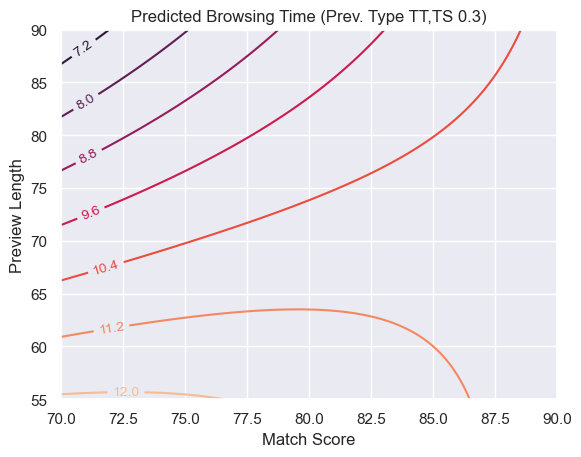

In [867]:
beta0 = model_ccd.params[0]
beta1 = model_ccd.params[1]
beta2 = model_ccd.params[2]
beta12 = model_ccd.params[3]
beta11 = model_ccd.params[4]
beta22 = model_ccd.params[5]

# x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = MS_L, UH = MS_U, UL = MS_L), 
#                                  convertNtoC(U = MS_U, UH = MS_U, UL = MS_L), 100), 
#                      np.linspace(convertNtoC(U = PL_L, UH = PL_U, UL = PL_L), 
#                                  convertNtoC(U = PL_U, UH = PL_U, UL = PL_L), 100))

x1, x2 = np.meshgrid(np.linspace(55,90, 100), 
                     np.linspace(70,90, 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2 
# pi = np.exp(eta)/(1+np.exp(eta))
h = plt.contour(x2, x1, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Match Score')
plt.ylabel('Preview Length')
plt.title('Predicted Browsing Time (Prev. Type TT,TS 0.3)')
plt.show()

In [857]:
# h = plt.contour(convertCtoN(x2, UH=PL_U, UL=PL_L),convertCtoN(x1, UH=MS_U, UL=MS_L),eta)
# plt.clabel(h, inline=True, fontsize=10)
# plt.xlabel('MS')
# plt.ylabel('PL')
# plt.title('Predicted Booking Rate')
# plt.show()

In [868]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Scroll time is minimized when x1:MS=", x_s[0], "and x2:PL=", x_s[1])

Scroll time is minimized when x1:MS= [[76.31143658]] and x2:PL= [[90.80877083]]


In [859]:
# xsN_1 = convertCtoN(x = x_s[0], UH = MS_U, UL = MS_L)
# xsN_2 = convertCtoN(x = x_s[1], UH = PL_U, UL = PL_L)
# print("MS=", xsN_1, ", PL=", xsN_2)

In [860]:
# convertCtoN(-0.86496696,MS_U,MS_L),convertCtoN(-0.0236639,PL_U,PL_L)

In [861]:
eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b) 
# print(np.exp(eta_s)/(1+np.exp(eta_s)))
print(eta_s)

[[10.69964857]]
